In [2]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc, ticker

%config InlineBackend.figure_format = 'retina'

TUdark = (55 / 255, 65 / 255, 74 / 255)
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc("font", **{"family": "serif", "serif": ["Roboto Condensed"]})
rc("text", **{"color": TUdark})
rc("axes", **{"edgecolor": TUdark, "labelcolor": TUdark})
rc("xtick", **{"color": TUdark})
rc("ytick", **{"color": TUdark})

On 18 Nov 2020, BioNTech and Pfizer [announced](https://www.nytimes.com/2020/11/18/health/pfizer-covid-vaccine.html) that their experimental Covid vaccine is ``95\% effective''. In such studies, the *vaccine efficacy* $E$ is defined as the relative reduction in risk of contracting the disease:
$$ E := \frac{\Delta p}{f_c} =: \frac{p(\text{infection}\mid \neg \text{vaccinated}) - p(\text{infection} \mid \text{vaccinated})}{p(\text{infection}\mid \neg \text{vaccinated})} = 1 - \frac{f_t}{f_c} $$
where $f_t = p(\text{infection}\mid \text{vaccinated})$ is the probability to contract the virus after **treatment** and $f_c = p(\text{infection}\mid \neg \text{vaccinated})$ is the probability in the **control** group, i.e. for people who have not been treated. The study involved 44\,000 participants, half of which where in the treatment and control groups, respectively. Of those, $m_t = 8$ and $m_c=162$ people contracted the virus in the two groups, respectively.

In [3]:
N_t = 22000
N_c = 22000

m_t = 8
m_c = 162

This study (the study protocol is [available online](https://cdn.pfizer.com/pfizercom/2020-11/C4591001_Clinical_Protocol_Nov2020.pdf)) was a *randomized controlled trial (RCT)* with two *arms*: Two separate groups of people of the same size were drawn iid. from the same population (they were randomly assigned to the treatment and control groups). Each arm thus consists of a sequence of $N_t$ or $N_c$ Bernoulli experiments respectively. The *likelihood* is thus the **binomial distribution** 
$$ p(m\mid N,f) = \begin{pmatrix} N \\ m \end{pmatrix} f^m (1-f)^{N-m} $$ 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


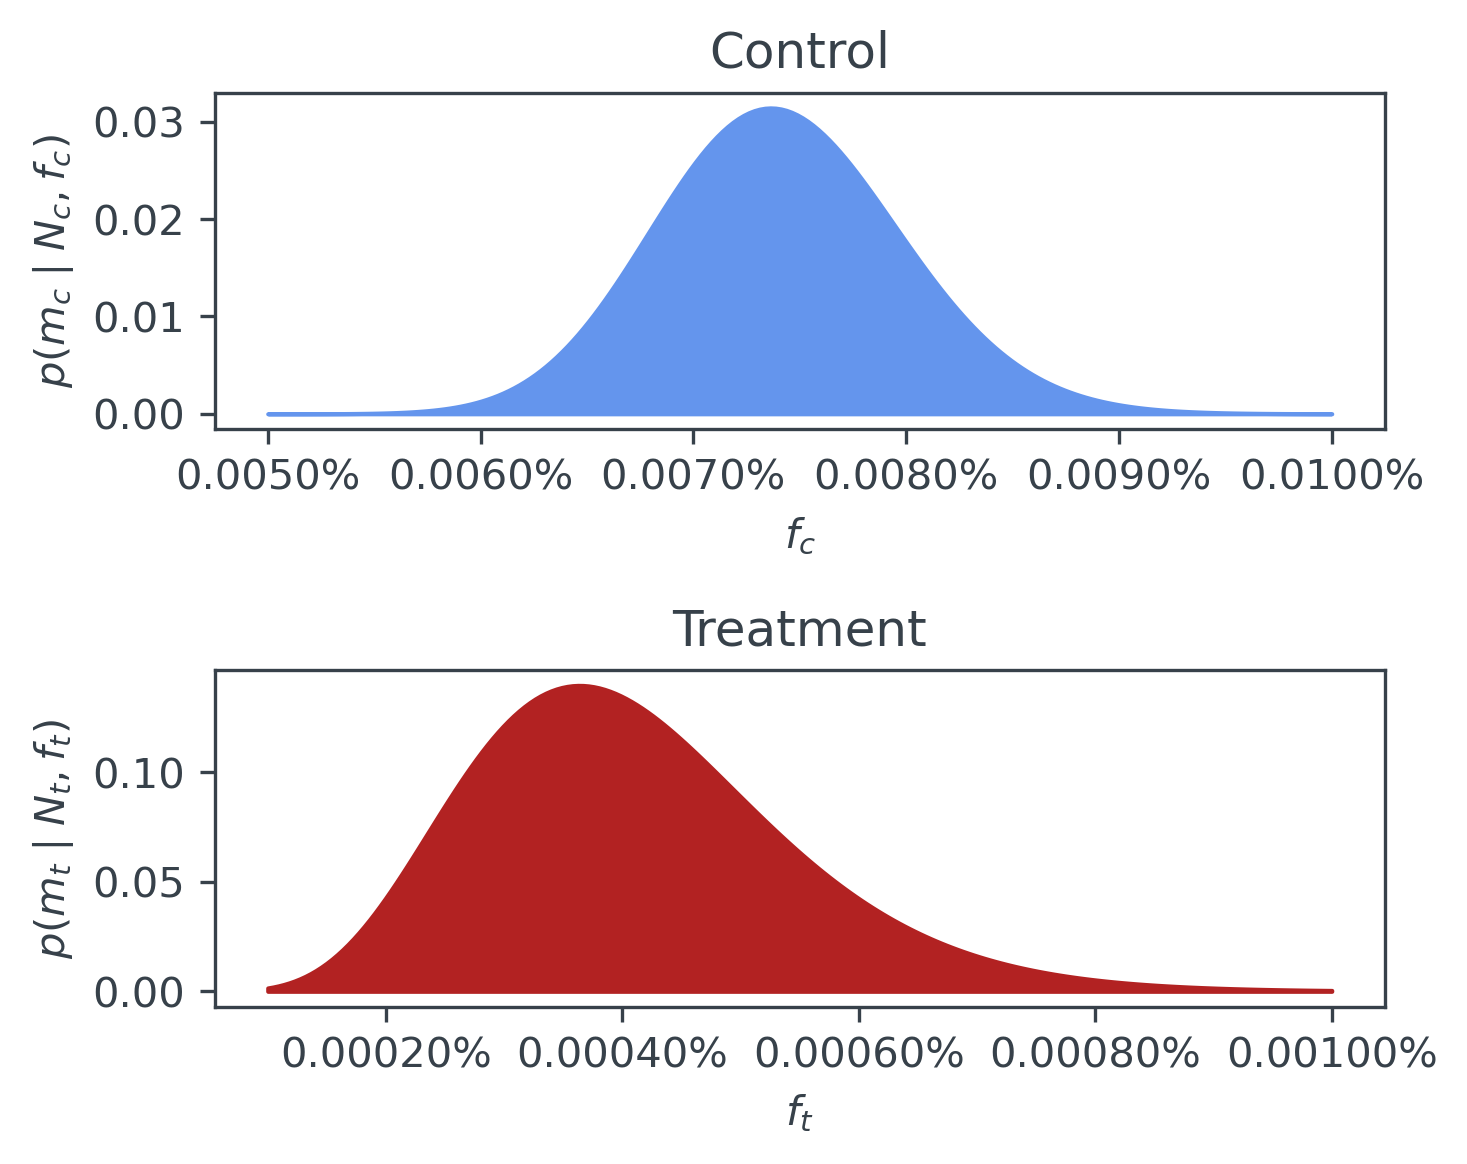

In [4]:
from scipy.stats import binom

pp_c = np.linspace(0.005, 0.01, 200)
pp_t = np.linspace(1e-4, 1e-3, 200)

fig, ax = plt.subplots(2,1, figsize=(5, 4),dpi=150)

ax[0].fill_between(pp_c, binom.pmf(m_c, N_c, pp_c),
           color="cornflowerblue", label="control")
ax[0].set_title("Control")
ax[0].set_xlabel("$f_c$")
ax[0].set_ylabel("$p(m_c\mid N_c, f_c)$")
ax[0].xaxis.set_major_formatter(ticker.PercentFormatter())

ax[1].fill_between(pp_t, binom.pmf(m_t, N_t, pp_t),
           color="firebrick", label="treatment")
ax[1].set_title("Treatment")
ax[1].set_xlabel("$f_t$")
ax[1].set_ylabel("$p(m_t\mid N_t, f_t)$")
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter())

fig.tight_layout()

It is easy to find the *maximum likelihood* estimator $\hat{f}$ by 
\begin{align*}
 \log p(m \mid N,f) &= m \log f + (N-m) \log(1-f) + \operatorname{const.}\\
 \frac{\partial \log p(m \mid N,f)}{\partial f} &= \frac{m}{f} - \frac{N-m}{1-f} = \frac{m(1-f) - (N-m)f}{f(1 - f)} = \frac{Nf + m}{f(f-1)} = s(n,m,f)\\
 \Rightarrow \quad \hat{f} &= \frac{m}{N}
\end{align*}
where we've conveniently encountered the *score function* $\displaystyle s(n,m,f) = \frac{\partial \log p(m \mid N,f)}{\partial f}$

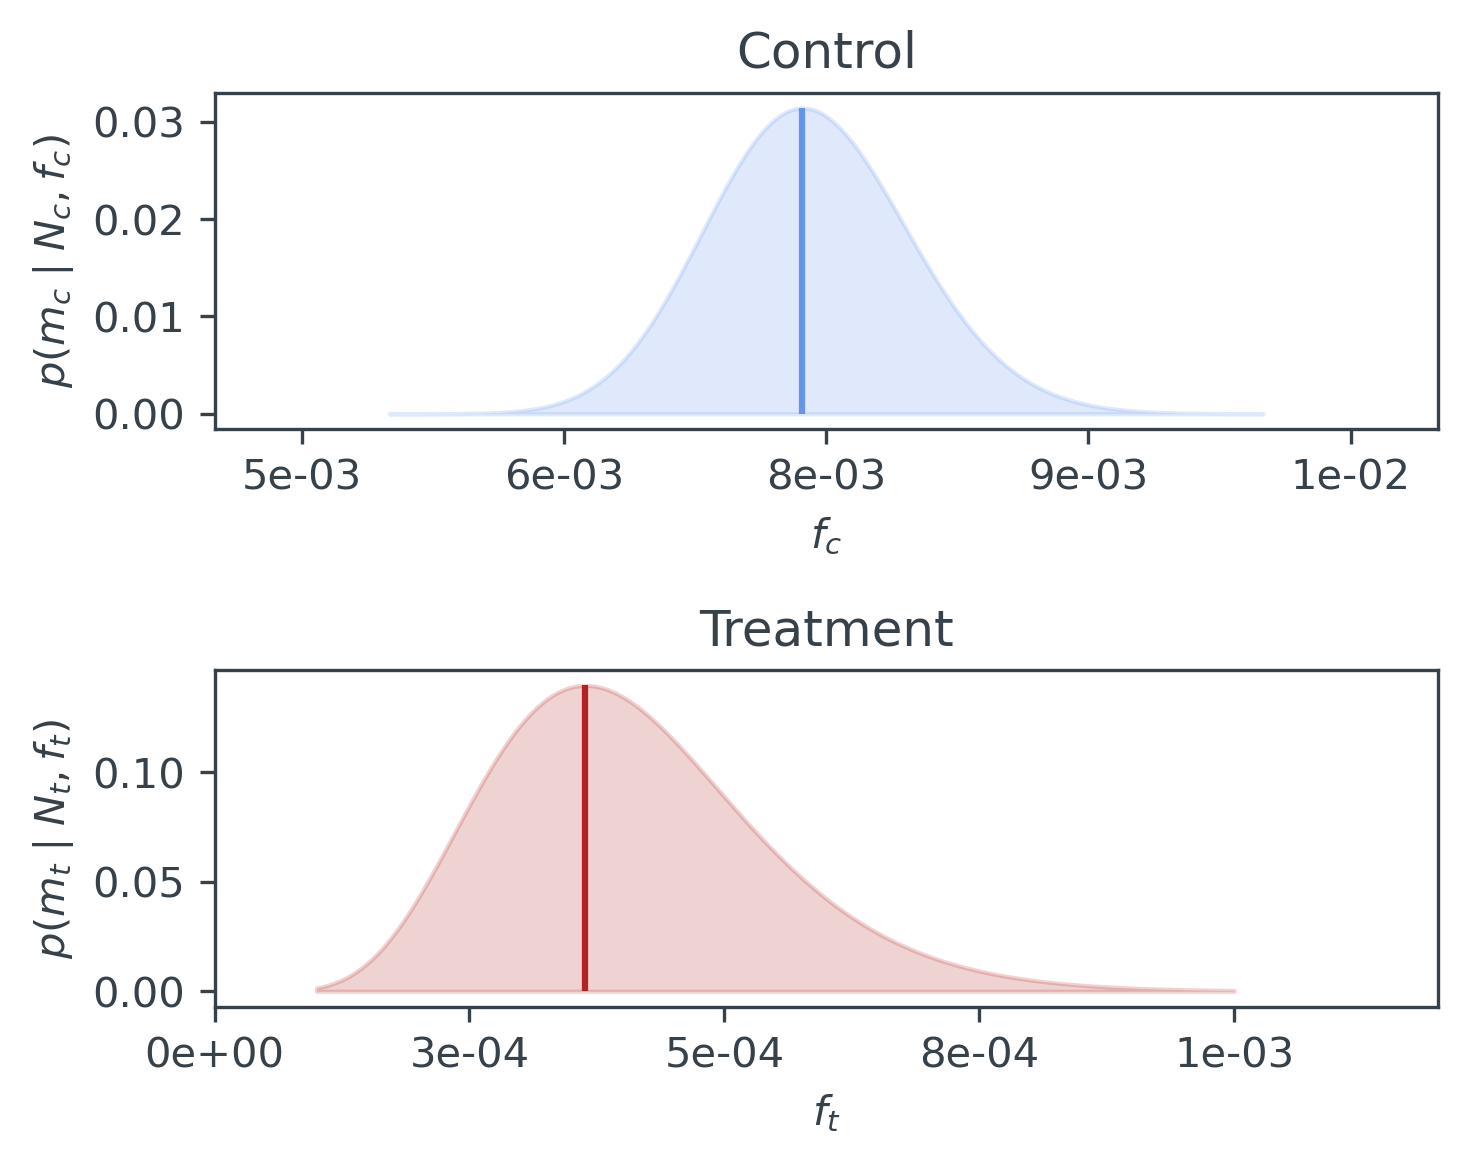

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(5, 4),dpi=150)

fh_c = m_c / N_c
fh_t = m_t / N_t

ax[0].fill_between(pp_c, binom.pmf(m_c, N_c, pp_c),
           color="cornflowerblue", label="control",alpha=0.2)
ax[0].vlines(fh_c, 0, binom.pmf(m_c, N_c, fh_c), color="cornflowerblue")
ax[0].set_xticks(list(ax[0].get_xticks()) + [fh_c])
# ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 60)

ax[0].set_title("Control")
ax[0].set_xlabel("$f_c$")
ax[0].set_ylabel("$p(m_c\mid N_c, f_c)$")
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

ax[1].fill_between(pp_t, binom.pmf(m_t, N_t, pp_t),
           color="firebrick", label="treatment",alpha=0.2)
ax[1].vlines(fh_t, 0, binom.pmf(m_t, N_t, fh_t), color="firebrick")
ax[1].set_xticks(list(ax[1].get_xticks()) + [fh_t])
# ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 60)

ax[1].set_title("Treatment")
ax[1].set_xlabel("$f_t$")
ax[1].set_ylabel("$p(m_t\mid N_t, f_t)$")
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(5))
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

fig.tight_layout()

What is the Fisher information matrix? It is defined as
\begin{align*}
I_N(f) &= - \mathbb{E}_{p(m\mid N,f)} \left( \frac{\partial^2 log p(m\mid N,f)}{\partial f^2} \right) \\
&= - \mathbb{E}_{p(m\mid N,f)} \left( \frac{\partial}{\partial f} \left(\frac{m}{f} - \frac{N-m}{1-f}\right) \right)\\
&= - \mathbb{E}_{p(m\mid N,f)} \left(-\frac{m}{f^2} - \frac{N-m}{(1-f)^2}\right)\\
&= \mathbb{E}_{p(m\mid N,f)} \left(\frac{m}{f^2} + \frac{N-m}{(1-f)^2} \right)\\
\end{align*}
and we can use the (easy to show) identities $\mathbb{E}_{p(m\mid N,f)}(m) = f N$ and $\mathbb{E}_{p(m\mid N,f)}(N-m) = (1-f) N$ to get
\begin{align*}
I_N(f) &= \frac{N}{f(f-1)}
\end{align*}
At the maximum likelihood estimator $\hat{f}=m/N$, we thus have
$$ I_N(\hat{f}) = \frac{N^3}{m(N-m)} $$
and thus asymptotically
$ \hat{f} \sim \mathcal{N}\left(\hat{f};f, \frac{m(N-m)}{N^3}\right)$

Thus, our estimate for p(infect|control) is 7.364e-03 p/m 5.764e-04
And our estimate for p(infect|treatment) is 3.636e-04 p/m 1.285e-04
A rough range for VE is thus between 90.00% and 100.30% with the (biased) maximum likelihood estimate at 95.06%


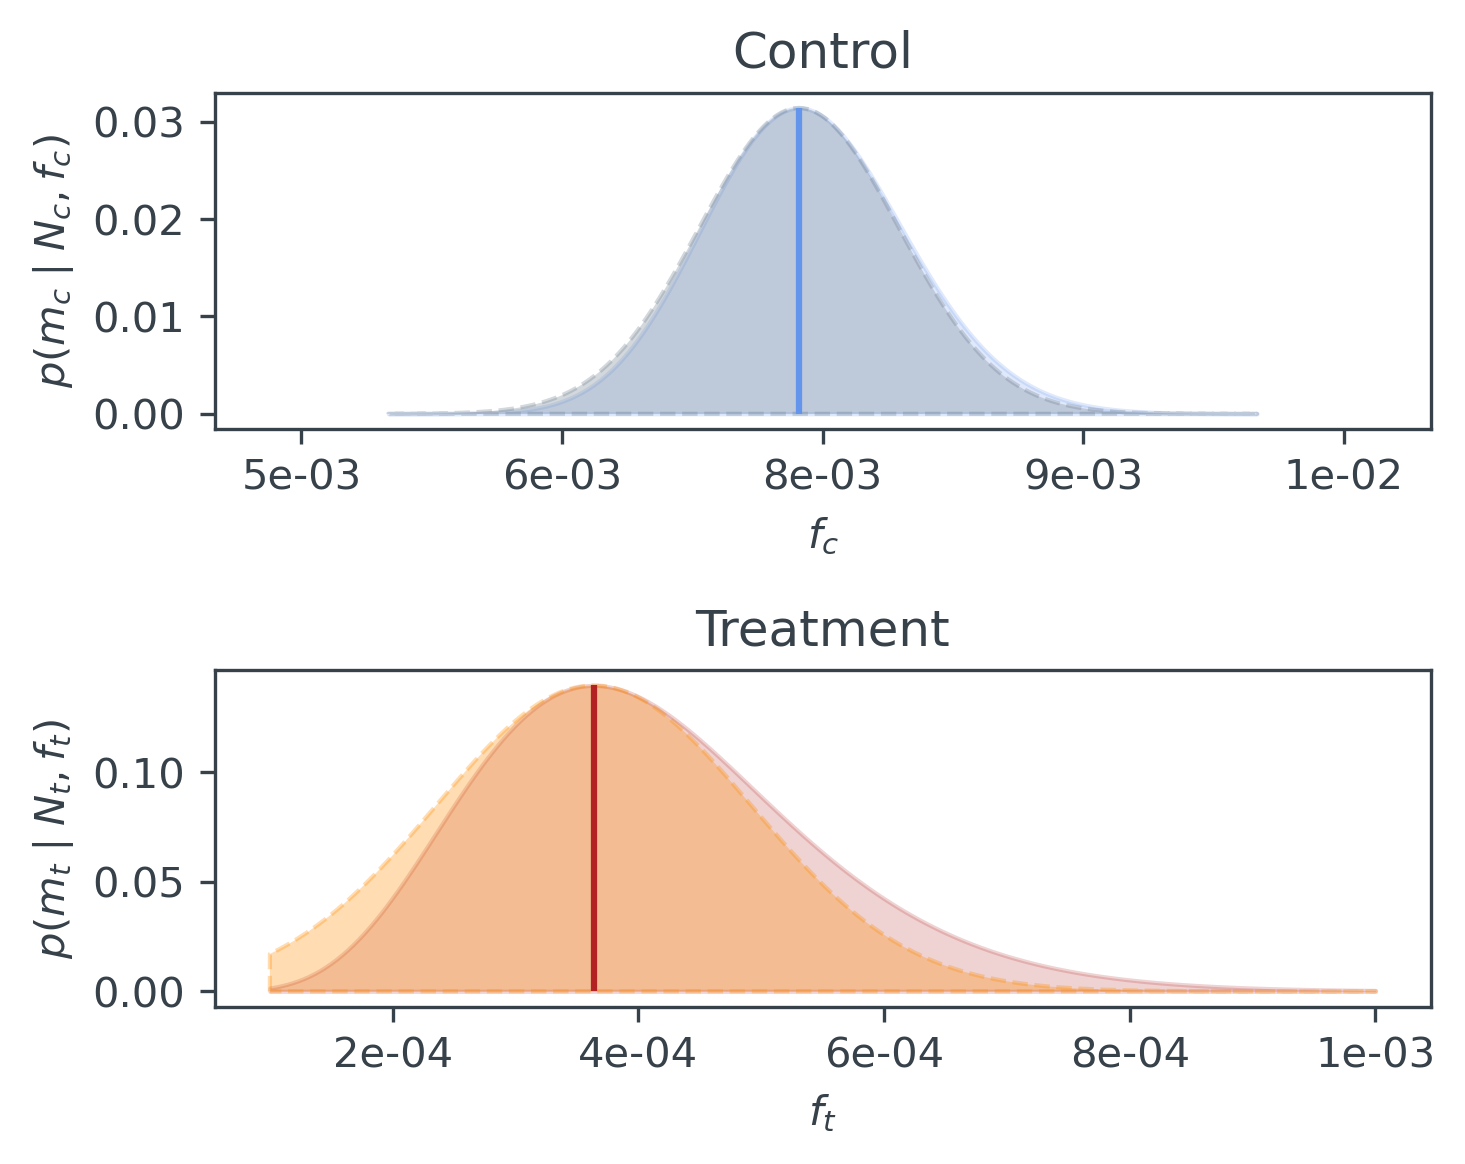

In [6]:
from scipy.stats import norm

fig, ax = plt.subplots(2, 1, figsize=(5, 4),dpi=150)

I_c = N_c ** 3 / (m_c * (N_c - m_c))
I_t = N_t ** 3 / (m_t * (N_t - m_t))

s_c = 1 / np.sqrt(I_c)
s_t = 1 / np.sqrt(I_t)

q_c = norm(loc=fh_c, scale=s_c)
q_t = norm(loc=fh_t, scale=s_t)

print(f"Thus, our estimate for p(infect|control) is {fh_c:.3e} p/m {s_c:.3e}")
print(f"And our estimate for p(infect|treatment) is {fh_t:.3e} p/m {s_t:.3e}")

worst_case = ((fh_c - s_t) - (fh_t + s_t)) / (fh_c + s_t)
best_case = ((fh_c + s_t) - (fh_t - s_t)) / (fh_c - s_t)
VE_estimate = (fh_c - fh_t) / fh_c

print(
    f"A rough range for VE is thus between {worst_case:.2%} and {best_case:.2%} with the (biased) maximum likelihood estimate at {VE_estimate:.2%}"
)

ax[0].fill_between(pp_c, binom.pmf(m_c, N_c, pp_c),
           color="cornflowerblue", label="control",alpha=0.2)
ax[0].vlines(fh_c, 0, binom.pmf(m_c, N_c, fh_c), color="cornflowerblue")
ax[0].fill_between(
    pp_c,
    q_c.pdf(pp_c) * binom.pmf(m_c, N_c, fh_c) / q_c.pdf(fh_c),
    linestyle="--",
    color="slategrey",
    label="control",
    alpha=0.3
)
ax[0].set_xticks(list(ax[0].get_xticks()) + [fh_c])

ax[0].set_title("Control")
ax[0].set_xlabel("$f_c$")
ax[0].set_ylabel("$p(m_c\mid N_c, f_c)$")
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))


ax[1].fill_between(pp_t, binom.pmf(m_t, N_t, pp_t),
           color="firebrick", label="treatment",alpha=0.2)
ax[1].vlines(fh_t, 0, binom.pmf(m_t, N_t, fh_t), color="firebrick")
ax[1].fill_between(
    pp_t,
    q_t.pdf(pp_t) * binom.pmf(m_t, N_t, fh_t) / q_t.pdf(fh_t),
    linestyle="--",
    color="darkorange",
    label="control",
    alpha=0.3
)
# ax[1].set_xticks(list(ax[1].get_xticks()) + [fh_t])

ax[1].set_title("Treatment")
ax[1].set_xlabel("$f_t$")
ax[1].set_ylabel("$p(m_t\mid N_t, f_t)$")
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(5))
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

fig.tight_layout()

In [16]:
N_sample = N_c  # so we can play with this number
N_bootstrap = int(1e4) # how many samples do we produce for the bootstrap?

rng = np.random.default_rng()
(rng.choice(N_c, size=(N_sample, N_bootstrap))
                 <= m_c).sum(axis=0)

array([161, 175, 182, ..., 171, 169, 171])

In [19]:
VE_bootstrap = (f_c_bootstrap - f_t_bootstrap) / f_c_bootstrap
VE_bootstrap

array([0.92903226, 0.93370166, 0.96685083, ..., 0.94904459, 0.92899408,
       0.91358025])

In [20]:
f_c_bootstrap

array([0.00704545, 0.00822727, 0.00822727, ..., 0.00713636, 0.00768182,
       0.00736364])

A different way to directly construct an approximation is the *bootstrap*: We re-sample the data with replacement and recompute the estimates:

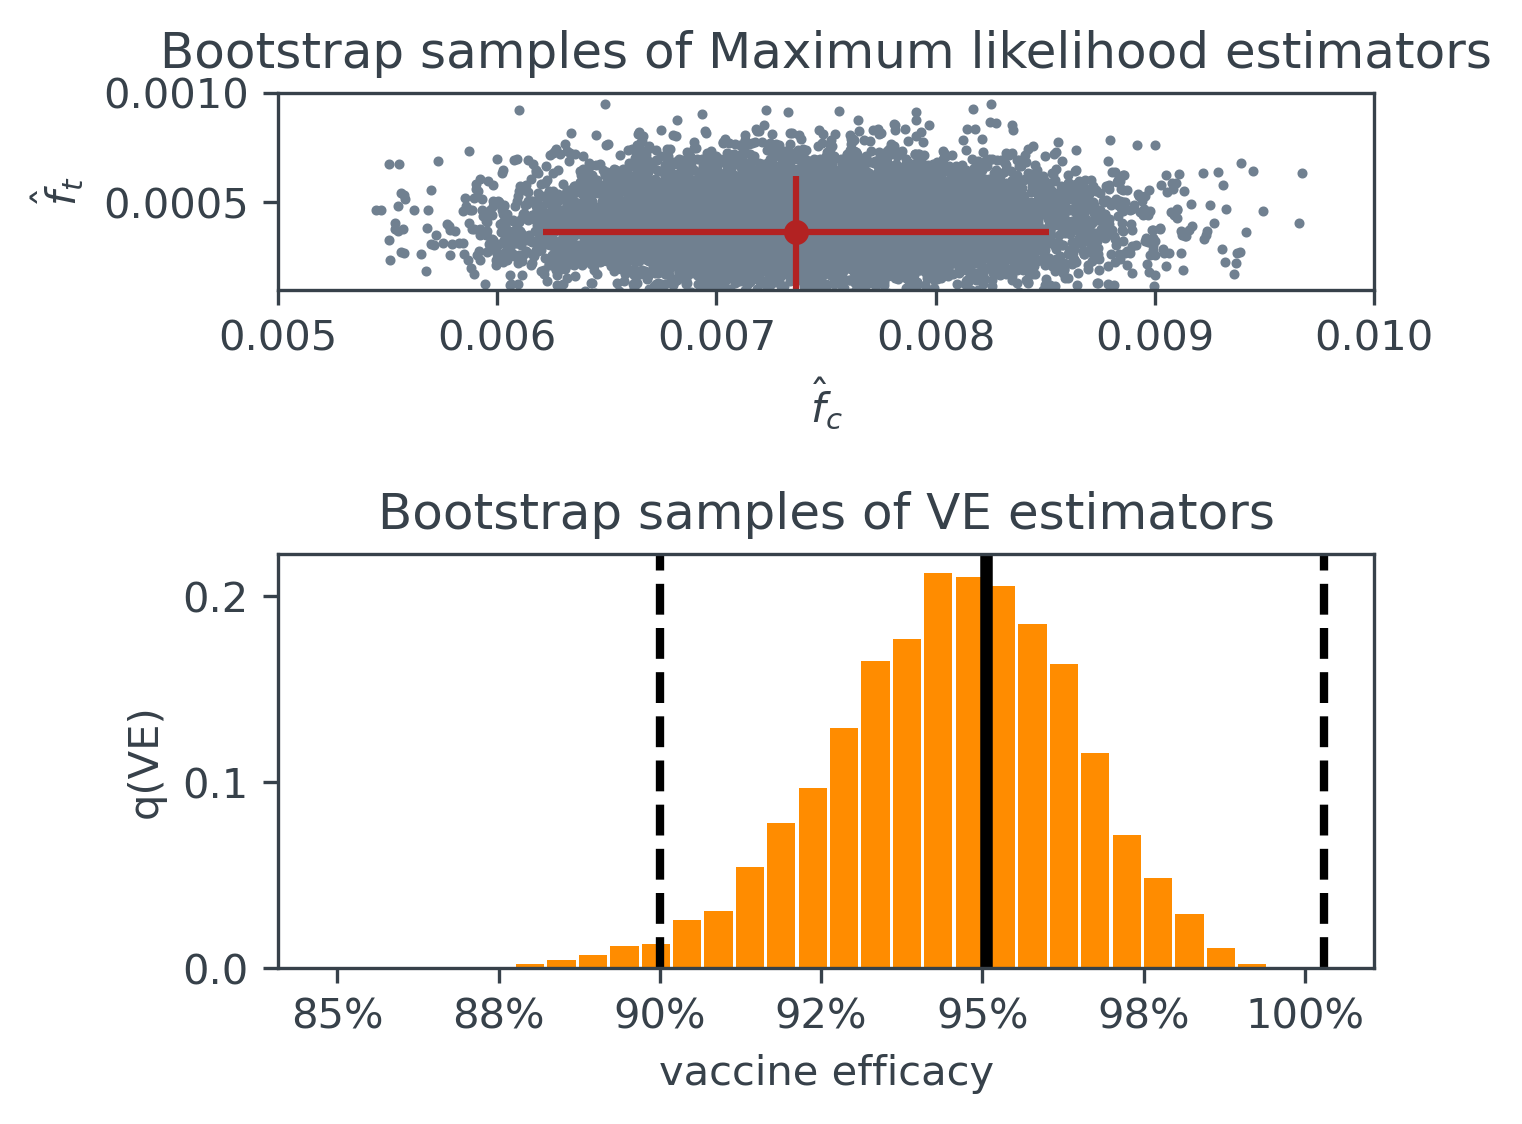

In [17]:
N_sample = N_c  # so we can play with this number
N_bootstrap = int(1e4) # how many samples do we produce for the bootstrap?

rng = np.random.default_rng()
m_c_bootstrap = (rng.choice(N_c, size=(N_sample, N_bootstrap))
                 <= m_c).sum(axis=0)
m_t_bootstrap = (rng.choice(N_t, size=(N_sample, N_bootstrap))
                 <= m_t).sum(axis=0)

f_c_bootstrap = m_c_bootstrap / N_sample
f_t_bootstrap = m_t_bootstrap / N_sample

VE_bootstrap = (f_c_bootstrap - f_t_bootstrap) / f_c_bootstrap

fig, ax = plt.subplots(2, 1, figsize=(5, 4),dpi=150)
# plot (adding some jitter to make all plots visible. Scalling the jitter by the typical values of the numbers)
ax[0].scatter(
    f_c_bootstrap + 1e-1 * (np.random.rand(len(f_c_bootstrap)) - 0.5) * fh_c,
    f_t_bootstrap + 1e-1 * (np.random.rand(len(f_t_bootstrap)) - 0.5) * fh_t,
    2,
    color="slategray",
)
ax[0].errorbar(
    fh_c, fh_t, yerr=2 * s_t, xerr=2 * s_c, marker="o", color="firebrick", ms=5
)
ax[0].set_xlim((pp_c[0], pp_c[-1]))
ax[0].set_ylim((pp_t[0], pp_t[-1]))
ax[0].set_aspect("equal", "box")
ax[0].set_ylabel("$\hat{f}_t$")
ax[0].set_xlabel("$\hat{f}_c$")
ax[0].set_title("Bootstrap samples of Maximum likelihood estimators")

ax[1].hist(VE_bootstrap * 100, bins=30, density=True, rwidth=0.9, color="darkorange")
ax[1].axvline(VE_estimate * 100, color="k", lw=3)
ax[1].axvline(worst_case * 100, linestyle="--", color="k", lw=2)
ax[1].axvline(best_case * 100, linestyle="--", color="k", lw=2)
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax[1].set_xlabel("vaccine efficacy")
ax[1].set_ylabel("q(VE)")
ax[1].set_title("Bootstrap samples of VE estimators");

fig.tight_layout()

Finally, there is also a Bayesian solution. If we consider the flat prior $p(f) = 1 = f^0 \cdot (1-f)^0 $ for all $f\in[0,1]$, then the posterior is given by the normalised likelihood
$$ p(f\mid N,m) = \frac{f^m \cdot (1-f)^{N-m}}{\int_0 ^1 f^m \cdot (1-f)^{N-m}\,df} $$
The normalization constant is given by the **Beta integral** $B(m+1,N-m+1)$, and this posterior distribution is known as *the Beta distribution* $\mathcal{B}(f;m+1,N-m+1)$. 

Unfortunately, the random variable $VE = \frac{p_c - p_t}{p_c}$ does not have an analytic posterior. But we can use simple and efficient code to construct a sampling estimator for it from the posteriors for $p_c,p_t$.

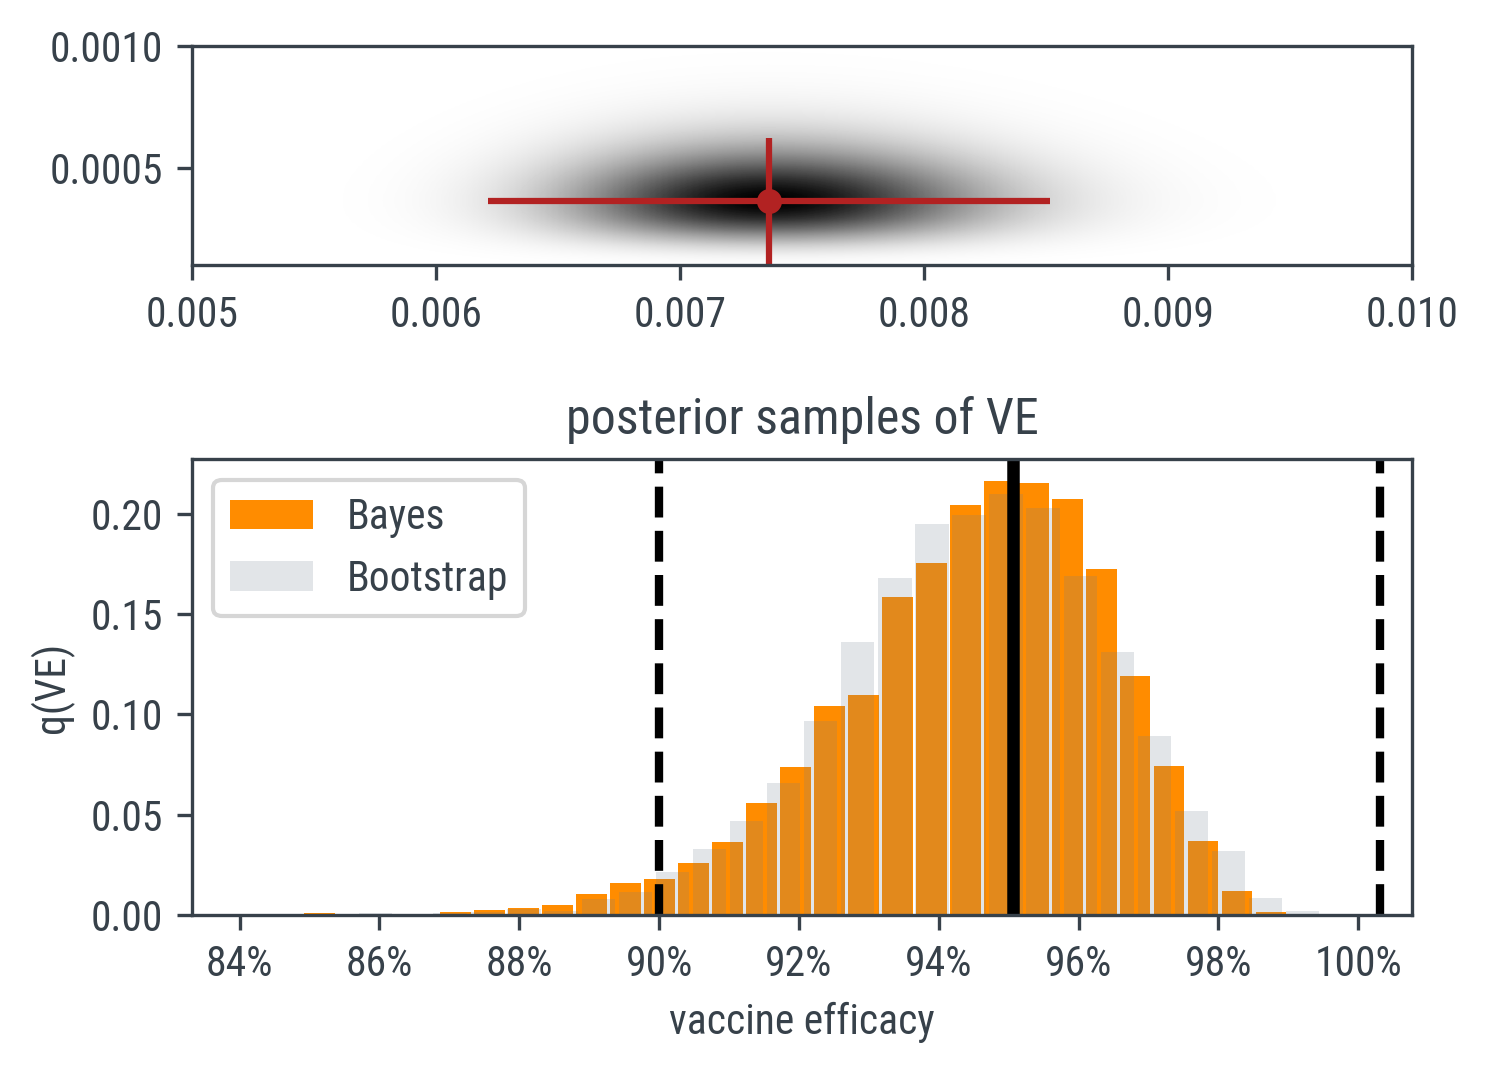

In [15]:
from scipy.stats import beta

p_c = beta(m_c + 1, N_c - m_c + 1)
p_t = beta(m_t + 1, N_t - m_t + 1)

pdf_c = p_c.pdf(pp_c)
pdf_t = p_t.pdf(pp_t)

c_samples = p_c.rvs(size=N_bootstrap)
t_samples = p_t.rvs(size=N_bootstrap)
VE_samples = (c_samples - t_samples) / c_samples

image = np.outer(pdf_t, pdf_c)

fig, ax = plt.subplots(2, 1, figsize=(5, 4),dpi=150)
ax[0].imshow(
    image, origin="lower", extent=[pp_c[0], pp_c[-1], pp_t[0], pp_t[-1]], cmap="binary"
)
ax[0].errorbar(
    fh_c, fh_t, yerr=2 * s_t, xerr=2 * s_c, marker="o", color="firebrick", ms=5
)

ax[1].hist(VE_samples * 100, bins=30, density=True, rwidth=0.9, color="darkorange",label='Bayes')
ax[1].hist(VE_bootstrap * 100, bins=30, density=True, rwidth=0.9, color="slategray",alpha=0.2,label='Bootstrap')
ax[1].axvline(VE_estimate * 100, color="k", lw=3)
ax[1].axvline(worst_case * 100, linestyle="--", color="k", lw=2)
ax[1].axvline(best_case * 100, linestyle="--", color="k", lw=2)
ax[1].legend(loc='upper left')
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax[1].set_xlabel("vaccine efficacy")
ax[1].set_ylabel("q(VE)")
ax[1].set_title("posterior samples of VE")

fig.tight_layout()